In [1]:
# Using this as a basis: https://github.com/AliPakzad/Machine-Learning-Capstone-Project/blob/main/date-a-scientist.ipynb
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

###########################
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, mean_squared_error, mean_absolute_error

In [2]:
#############################################

#Create your df here:
df = pd.read_csv("profiles.csv")

In [4]:
#####################
# normalise the dataset counts by male/female instead of using counts
#####################
print(df.head(15))
print(df.pets.head())

#print(df.shape())   # doesn't work here!

    age       body_type               diet      drinks      drugs   
0    22  a little extra  strictly anything    socially      never  \
1    35         average       mostly other       often  sometimes   
2    38            thin           anything    socially        NaN   
3    23            thin         vegetarian    socially        NaN   
4    29        athletic                NaN    socially      never   
5    29         average    mostly anything    socially        NaN   
6    32             fit  strictly anything    socially      never   
7    31         average    mostly anything    socially      never   
8    24             NaN  strictly anything    socially        NaN   
9    37        athletic    mostly anything  not at all      never   
10   35         average    mostly anything    socially        NaN   
11   28         average    mostly anything    socially      never   
12   24             NaN                NaN       often        NaN   
13   30          skinny    mostly 

In [5]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

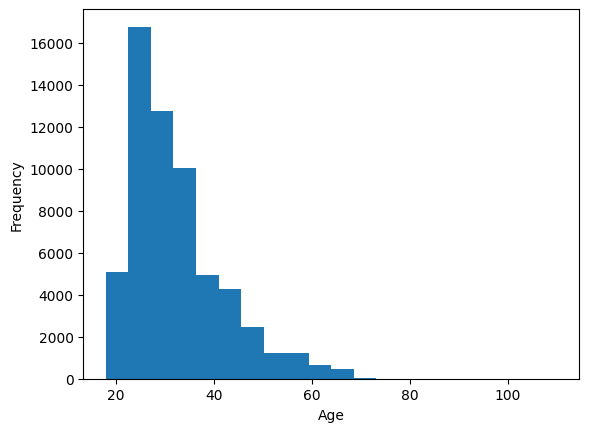

In [6]:
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

sign
gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;

(50.0, 85.0)

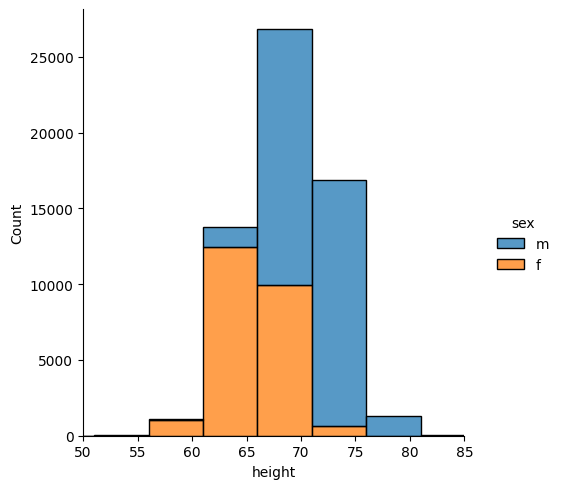

In [7]:
val = df.sign.value_counts()
print(val)
sns.displot(data=df, x="height", hue="sex", binwidth=5, multiple="stack")
plt.xlim(50,85)

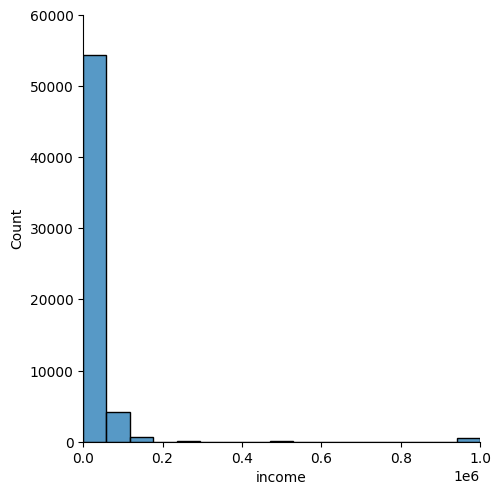

In [22]:
sns.displot(data=df, x="income")
plt.xlim(0,1e6)
plt.ylim(0,0.6e5)
plt.show()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'a little extra'),
  Text(1, 0, 'average'),
  Text(2, 0, 'thin'),
  Text(3, 0, 'athletic'),
  Text(4, 0, 'fit'),
  Text(5, 0, 'skinny'),
  Text(6, 0, 'curvy'),
  Text(7, 0, 'full figured'),
  Text(8, 0, 'jacked'),
  Text(9, 0, 'rather not say'),
  Text(10, 0, 'used up'),
  Text(11, 0, 'overweight')])

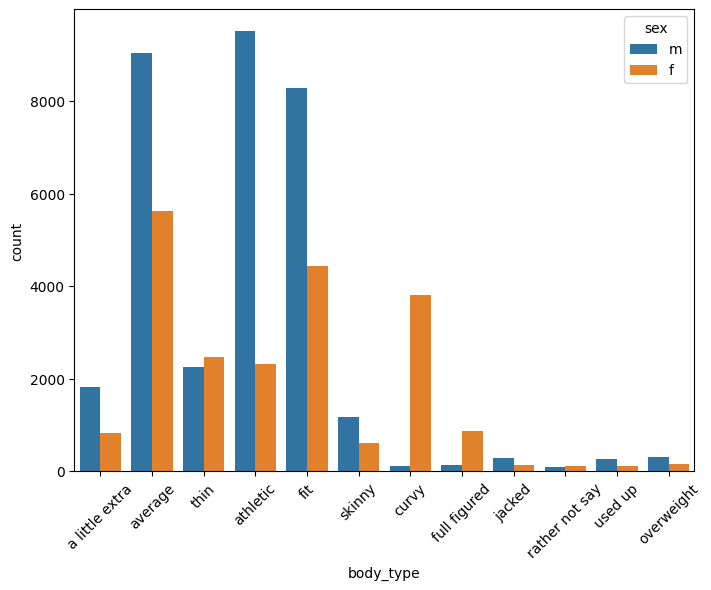

In [26]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="body_type", hue="sex")
plt.xticks(rotation=45)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'strictly anything'),
  Text(1, 0, 'mostly other'),
  Text(2, 0, 'anything'),
  Text(3, 0, 'vegetarian'),
  Text(4, 0, 'mostly anything'),
  Text(5, 0, 'mostly vegetarian'),
  Text(6, 0, 'strictly vegan'),
  Text(7, 0, 'strictly vegetarian'),
  Text(8, 0, 'mostly vegan'),
  Text(9, 0, 'strictly other'),
  Text(10, 0, 'mostly halal'),
  Text(11, 0, 'other'),
  Text(12, 0, 'vegan'),
  Text(13, 0, 'mostly kosher'),
  Text(14, 0, 'strictly halal'),
  Text(15, 0, 'halal'),
  Text(16, 0, 'strictly kosher'),
  Text(17, 0, 'kosher')])

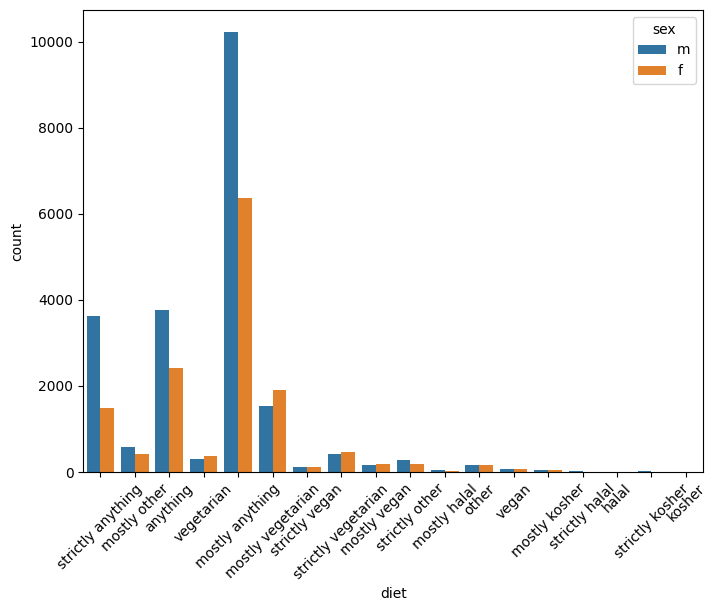

In [27]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="diet", hue="sex")     #females more likely for vegetarian/vegan
plt.xticks(rotation=45)


<Axes: xlabel='drinks', ylabel='count'>

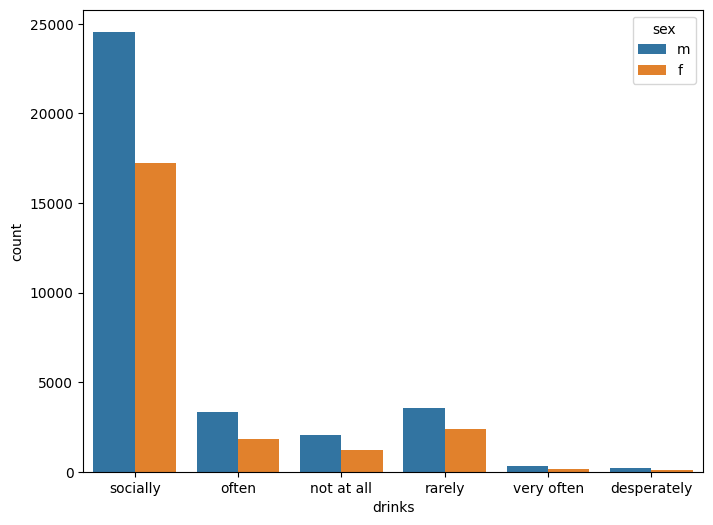

In [28]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="drinks", hue="sex")     


<Axes: xlabel='drugs', ylabel='count'>

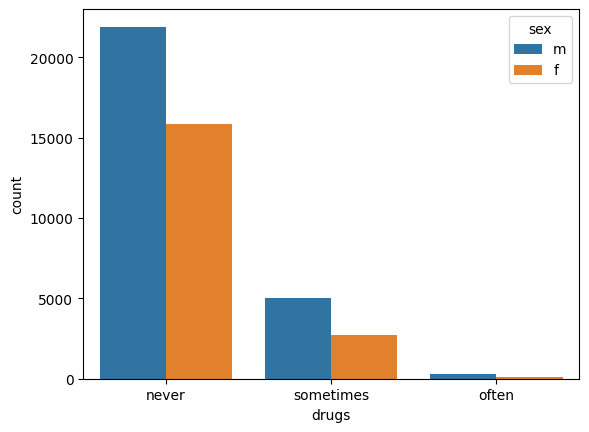

In [30]:
#plt.figure(figsize=(8,6))
sns.countplot(data=df, x="drugs", hue="sex")     
#sns.countplot(data=df, y="smokes", hue="sex") 


<Axes: xlabel='smokes', ylabel='count'>

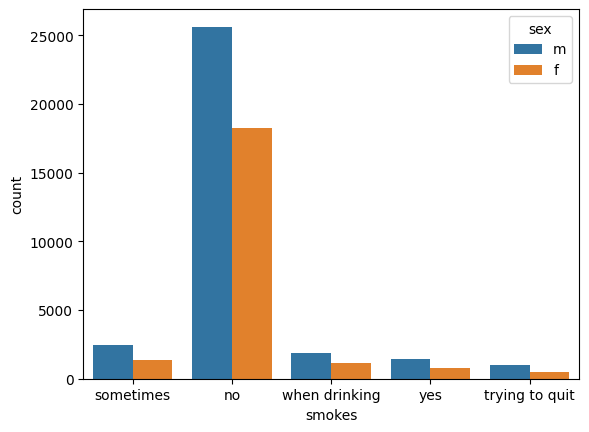

In [32]:
sns.countplot(data=df, x="smokes", hue="sex") 


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]),
 [Text(0, 0, 'working on college/university'),
  Text(1, 0, 'working on space camp'),
  Text(2, 0, 'graduated from masters program'),
  Text(3, 0, 'graduated from college/university'),
  Text(4, 0, 'working on two-year college'),
  Text(5, 0, 'graduated from high school'),
  Text(6, 0, 'working on masters program'),
  Text(7, 0, 'graduated from space camp'),
  Text(8, 0, 'college/university'),
  Text(9, 0, 'dropped out of space camp'),
  Text(10, 0, 'graduated from ph.d program'),
  Text(11, 0, 'graduated from law school'),
  Text(12, 0, 'working on ph.d program'),
  Text(13, 0, 'two-year college'),
  Text(14, 0, 'graduated from two-year college'),
  Text(15, 0, 'working on med school'),
  Text(16, 0, 'dropped out of college/university'),
  Text(17, 0, 'space camp'),
  Text(18, 0, 'graduated from med school'),
  Text(19, 0, 'dropped out of hi

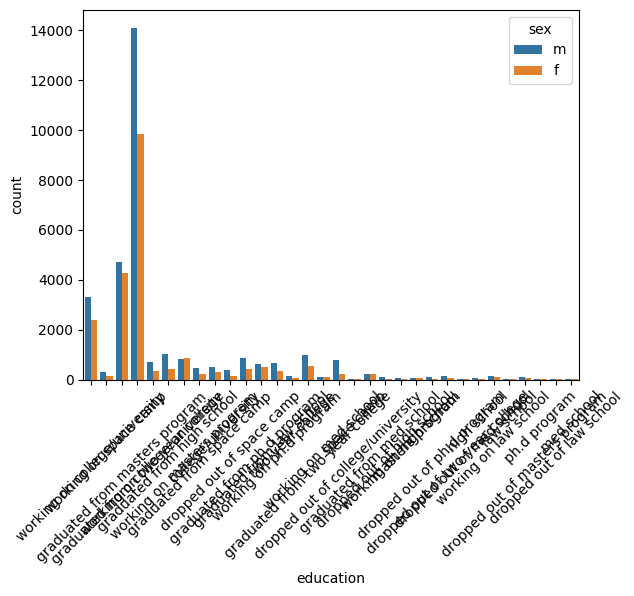

In [34]:
#plt.figure(figsize=(8,6))
sns.countplot(data=df, x="education", hue="sex")  
plt.xticks(rotation=45) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'transportation'),
  Text(1, 0, 'hospitality / travel'),
  Text(2, 0, 'student'),
  Text(3, 0, 'artistic / musical / writer'),
  Text(4, 0, 'computer / hardware / software'),
  Text(5, 0, 'banking / financial / real estate'),
  Text(6, 0, 'entertainment / media'),
  Text(7, 0, 'sales / marketing / biz dev'),
  Text(8, 0, 'other'),
  Text(9, 0, 'medicine / health'),
  Text(10, 0, 'science / tech / engineering'),
  Text(11, 0, 'executive / management'),
  Text(12, 0, 'education / academia'),
  Text(13, 0, 'clerical / administrative'),
  Text(14, 0, 'construction / craftsmanship'),
  Text(15, 0, 'rather not say'),
  Text(16, 0, 'political / government'),
  Text(17, 0, 'law / legal services'),
  Text(18, 0, 'unemployed'),
  Text(19, 0, 'military'),
  Text(20, 0, 'retired')])

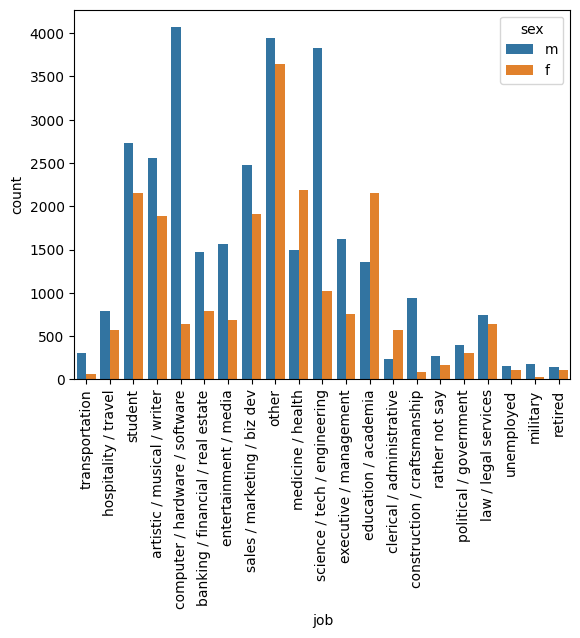

In [35]:
#plt.figure(figsize=(8,6))
sns.countplot(data=df, x="job", hue="sex")  
plt.xticks(rotation=90)
#plt.show()

In [36]:
print(df.job.value_counts())

job
other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4439
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: count, dtype: int64


<Axes: xlabel='count', ylabel='offspring'>

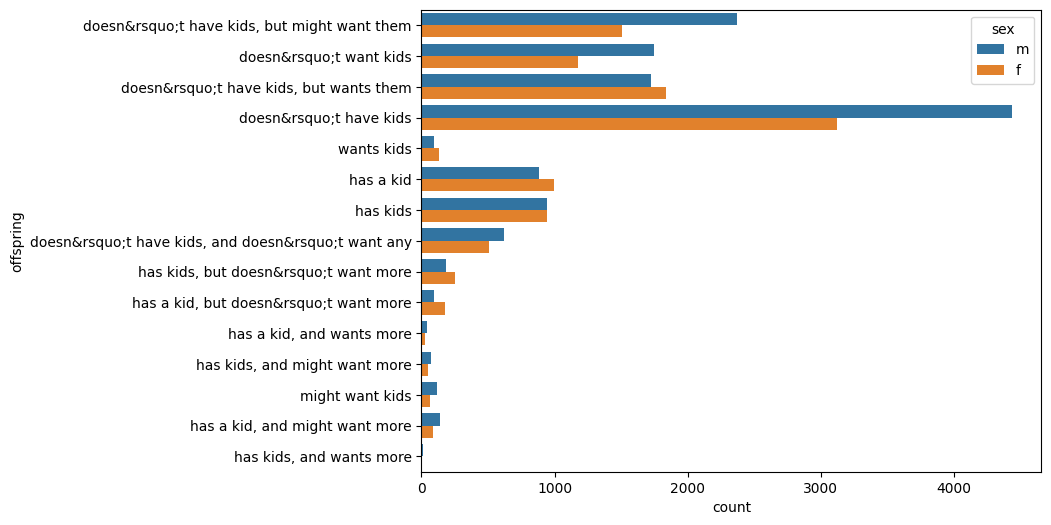

In [37]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y="offspring", hue="sex")  

<Axes: xlabel='orientation', ylabel='count'>

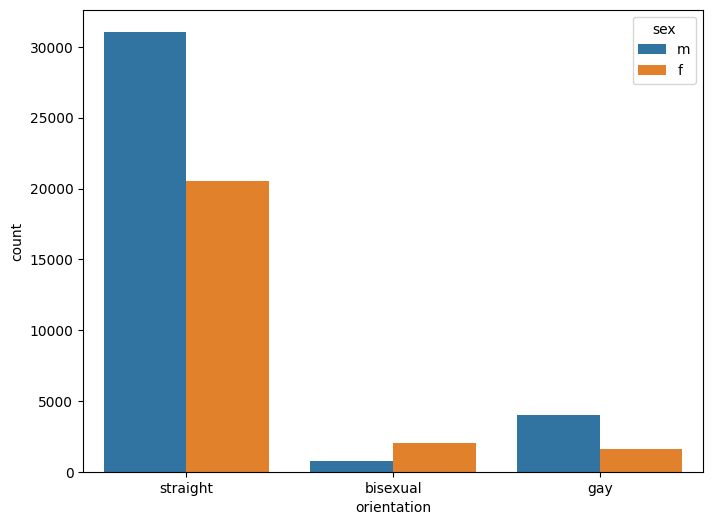

In [39]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, x="orientation", hue="sex")  

<Axes: xlabel='count', ylabel='pets'>

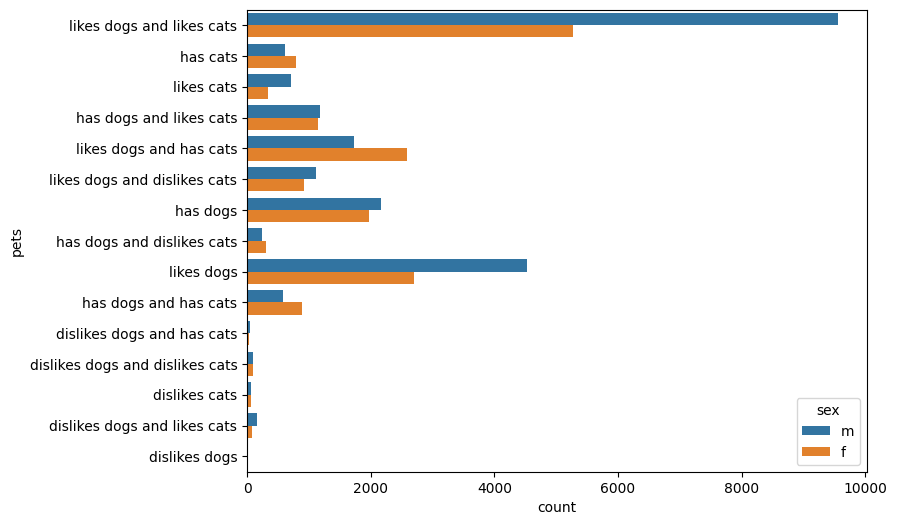

In [40]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y="pets", hue="sex") 

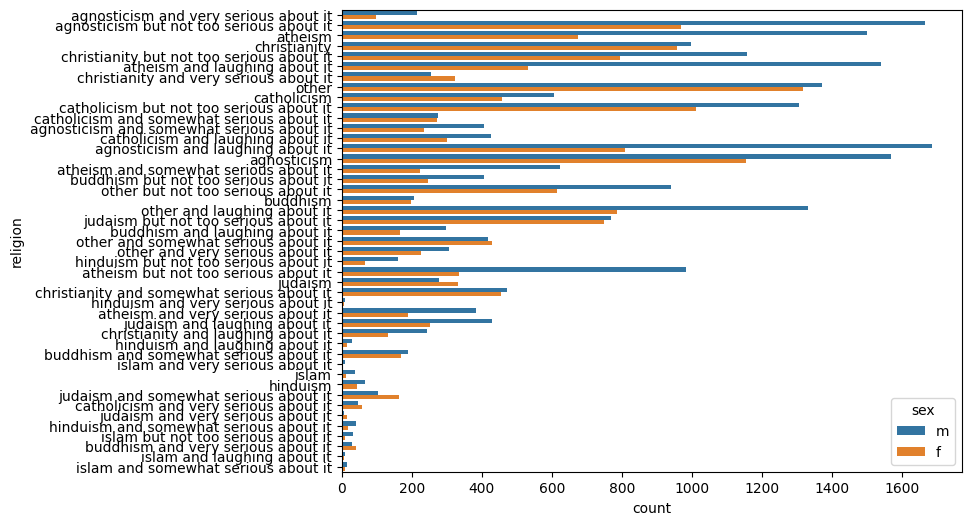

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(data=df, y="religion", hue="sex") 
# order by religion groups, no separation on how serious. Loads of no answer, NaN.
df['religion_cleaned'] = df['religion'].str.split().str[0]

<Axes: xlabel='count', ylabel='religion_cleaned'>

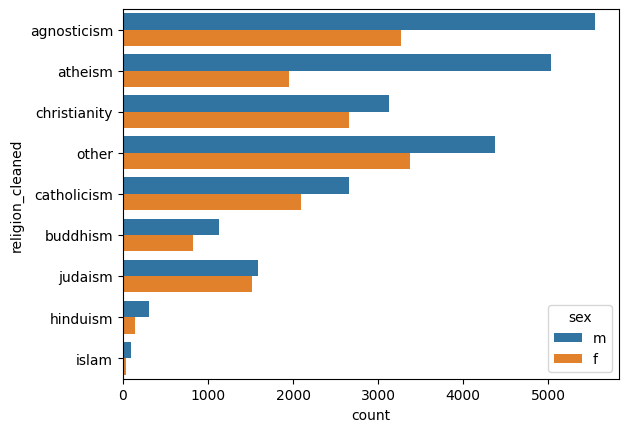

In [42]:
sns.countplot(data=df, y="religion_cleaned", hue="sex") 

<Axes: xlabel='count', ylabel='sign_cleaned'>

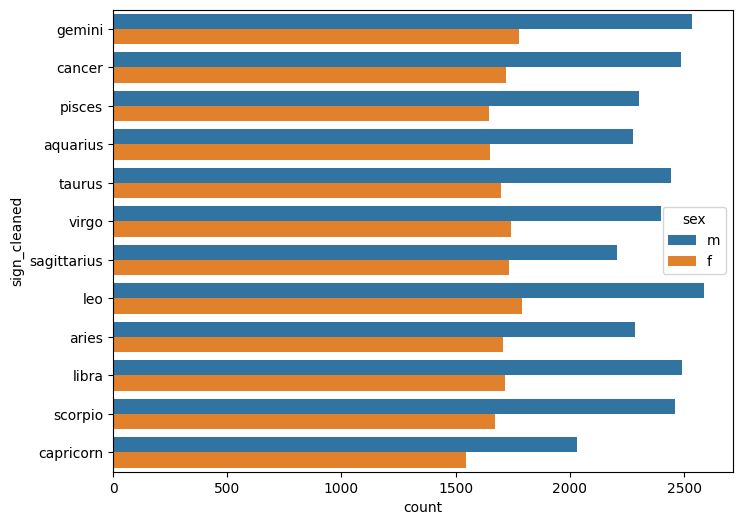

In [44]:
# clean this data
df['sign_cleaned'] = df['sign'].str.split().str[0]

plt.figure(figsize=(8,6))
sns.countplot(data=df, y="sign_cleaned", hue="sex") 

In [45]:
print(df.isnull().sum())

age                     0
body_type            5296
diet                24395
drinks               2985
drugs               14080
education            6628
essay0               5488
essay1               7572
essay2               9638
essay3              11476
essay4              10537
essay5              10850
essay6              13771
essay7              12451
essay8              19225
essay9              12603
ethnicity            5680
height                  3
income                  0
job                  8198
last_online             0
location                0
offspring           35561
orientation             0
pets                19921
religion            20226
sex                     0
sign                11056
smokes               5512
speaks                 50
status                  0
religion_cleaned    20226
sign_cleaned        11056
dtype: int64


In [46]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
df["drinks_code"] = df.drinks.map(drink_mapping)
smoke_mapping = {"no": 0, "sometimes": 1, "when drinking": 2, "yes": 3, "trying to quit": 4}
df["smokes_code"] = df.smokes.map(smoke_mapping)
drug_mapping = {"never": 0, "sometimes": 1, "often": 2}
df["drugs_code"] = df.drugs.map(drug_mapping)
body_type_codes = {'thin':0, 'skinny':1, 'fit':2, 'athletic':3, 'jacked':4, 'rather not say':5, 'average':6, 'a little extra':7, 'used up':8, 'curvy':9, 'overweight':10, 'full figured':11}
df["body_type_code"] = df['body_type'].map(body_type_codes)
#print(df["body_type_code"])
#print(df["body_type_code"].value_counts())
#print(df.drugs.value_counts())
#print(df.religion.value_counts())
#print(df.religion.info())

##essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

In [47]:
# Removing the NaNs
'''all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df['word_len'] = all_essays.apply(lambda x: len(x.split()))

#word_len = all_essays.str.split().apply(lambda x: [len(i) for i in x]).mean()
#df['avg_word_length'] = df['word_len'].mean()
#print(word_len)

df["essay_len"] = all_essays.apply(lambda x: len(x))
##df["avg_word_len"] = all_essays.apply(sum(len(word) for word in all_essays) / len(all_essays))
#print(all_essays[3])'''

# get only selected items for data anaylsis, and remove any NaN values while we're at it
grabbed = ['sign_cleaned', 'body_type_code', 'diet', 'orientation', 'pets', 'religion_cleaned', 'sex', 'job', 'smokes_code', 'drinks_code' , 'drugs_code']
data = df[grabbed].dropna()
#data = data.dropna()

In [48]:
# convert diet and job into dummy indicator vars
dummy_list = ["diet", "job", "orientation", "pets", "religion_cleaned", "sex", "body_type_code"]
for item in dummy_list:
    data = pd.get_dummies(data, columns=[item], prefix=[item])
#print(data.head(15))

In [49]:
############### Split the data
features = data.iloc[:, 1:]
label = data['sign_cleaned']

X_train, X_Test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=1)

y_train = y_train.ravel()
y_test = y_test.ravel()

#scale and normalise the data
scaler = MinMaxScaler()
X_train_Scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_Test)


In [50]:
################## Build the models
##### Naive Bayes
NbModel = MultinomialNB()

NbModel.fit(X_train_Scaled, y_train)
accuracy = NbModel.score(X_train_Scaled, y_train)

#print("accuracy is: ", str(accuracy))
predictions = NbModel.predict(X_test_scaled)
result = classification_report(y_test, predictions)
print("\nPredictions: ", str(result))



Predictions:                precision    recall  f1-score   support

    aquarius       0.10      0.03      0.05       301
       aries       0.07      0.05      0.06       332
      cancer       0.10      0.10      0.10       351
   capricorn       0.08      0.04      0.05       286
      gemini       0.08      0.12      0.10       337
         leo       0.09      0.10      0.09       344
       libra       0.09      0.11      0.10       323
      pisces       0.11      0.09      0.09       313
 sagittarius       0.07      0.06      0.07       285
     scorpio       0.06      0.05      0.05       332
      taurus       0.09      0.10      0.09       335
       virgo       0.09      0.18      0.12       340

    accuracy                           0.09      3879
   macro avg       0.09      0.09      0.08      3879
weighted avg       0.09      0.09      0.08      3879



In [51]:
##### Logistic Regression
logReg = LogisticRegression(multi_class="multinomial")
logReg.fit(X_train_Scaled, y_train)
logRegAcc = logReg.score(X_train_Scaled, y_train)
print("accuracy is: ", str(logRegAcc))

logReg_pred = logReg.predict(X_test_scaled)
logRegRes = classification_report(y_test, logReg_pred)
print("\nPredictions: ", str(logRegRes))

accuracy is:  0.1263262599469496

Predictions:                precision    recall  f1-score   support

    aquarius       0.09      0.04      0.05       301
       aries       0.07      0.05      0.05       332
      cancer       0.11      0.11      0.11       351
   capricorn       0.07      0.03      0.04       286
      gemini       0.08      0.12      0.10       337
         leo       0.09      0.12      0.10       344
       libra       0.09      0.09      0.09       323
      pisces       0.06      0.05      0.05       313
 sagittarius       0.07      0.07      0.07       285
     scorpio       0.05      0.04      0.05       332
      taurus       0.08      0.07      0.08       335
       virgo       0.09      0.16      0.11       340

    accuracy                           0.08      3879
   macro avg       0.08      0.08      0.08      3879
weighted avg       0.08      0.08      0.08      3879



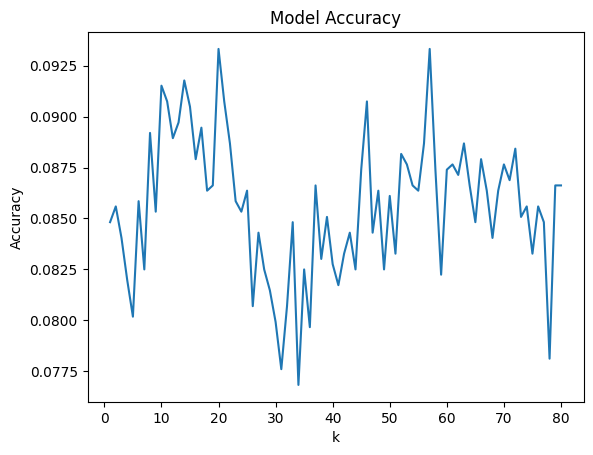

In [52]:
##### K Nearest Neighbour
# Find best K
KNN_results = []
kMax = 80
kList = list(range(1,kMax+1))

for k in range(1,kMax+1):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_Scaled, y_train)
    KNN_results.append(KNNmodel.score(X_test_scaled, y_test))
    
plt.plot(kList, KNN_results)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Model Accuracy")
plt.show()

In [55]:
# get best k automatically to feed into the next section!
bestK = np.array(KNN_results).argmax()
print(bestK)

19


In [56]:
KNNmodel = KNeighborsClassifier(n_neighbors = bestK)
KNNmodel.fit(X_train_Scaled, y_train)
knn_acc = KNNmodel.score(X_train_Scaled, y_train)

print("KNN accuracy is: {}%".format(round(knn_acc, 2) *100))
predictions = KNNmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))


KNN accuracy is: 21.0%
              precision    recall  f1-score   support

    aquarius       0.09      0.14      0.11       301
       aries       0.11      0.14      0.12       332
      cancer       0.08      0.12      0.09       351
   capricorn       0.05      0.05      0.05       286
      gemini       0.08      0.09      0.08       337
         leo       0.10      0.11      0.11       344
       libra       0.06      0.05      0.05       323
      pisces       0.10      0.08      0.09       313
 sagittarius       0.08      0.06      0.07       285
     scorpio       0.08      0.05      0.07       332
      taurus       0.08      0.05      0.06       335
       virgo       0.10      0.08      0.09       340

    accuracy                           0.09      3879
   macro avg       0.09      0.09      0.08      3879
weighted avg       0.09      0.09      0.08      3879



In [57]:
##### Decision Tree Classifier
DT_model = DecisionTreeClassifier()

DT_model.fit(X_train_Scaled, y_train)
DT_acc = DT_model.score(X_train_Scaled, y_train)

print("DT accuracy is: {}%".format(round(DT_acc, 2) *100))

DT_pred = DT_model.predict(X_test_scaled)
print(classification_report(y_test, DT_pred))

DT accuracy is: 92.0%
              precision    recall  f1-score   support

    aquarius       0.07      0.08      0.07       301
       aries       0.06      0.07      0.07       332
      cancer       0.11      0.11      0.11       351
   capricorn       0.08      0.08      0.08       286
      gemini       0.09      0.09      0.09       337
         leo       0.08      0.08      0.08       344
       libra       0.09      0.09      0.09       323
      pisces       0.06      0.05      0.06       313
 sagittarius       0.07      0.07      0.07       285
     scorpio       0.07      0.06      0.07       332
      taurus       0.05      0.04      0.05       335
       virgo       0.09      0.10      0.10       340

    accuracy                           0.08      3879
   macro avg       0.08      0.08      0.08      3879
weighted avg       0.08      0.08      0.08      3879



In [58]:
######################
#Take religion out and see if DT performs any better
# get only selected items for data anaylsis, and remove any NaN values while we're at it
grabbed2 = ['sign_cleaned', 'body_type_code', 'diet', 'orientation', 'pets', 'sex', 'job', 'smokes_code', 'drinks_code' , 'drugs_code']
data2 = df[grabbed2].dropna()

# convert diet and job into dummy indicator vars
dummy_list2 = ["diet", "job", "orientation", "pets", "sex", "body_type_code"]
for item in dummy_list2:
    data2 = pd.get_dummies(data2, columns=[item], prefix=[item])
#print(data.head(15))

features2 = data2.iloc[:, 1:]
label2 = data2['sign_cleaned']

X_train2, X_Test2, y_train2, y_test2 = train_test_split(features2, label2, test_size=0.3, random_state=1)

y_train2 = y_train2.ravel()
y_test2 = y_test2.ravel()

#scale and normalise the data
scaler2 = MinMaxScaler()
X_train_Scaled2 = scaler2.fit_transform(X_train2)
X_test_scaled2 = scaler2.fit_transform(X_Test2)

#model on new data
DT_model2 = DecisionTreeClassifier()

DT_model2.fit(X_train_Scaled2, y_train2)
DT_acc2 = DT_model2.score(X_train_Scaled2, y_train2)

print("new DT accuracy is: {}%".format(round(DT_acc2, 2) *100))
DT_pred = DT_model.predict(X_test_scaled)
print(classification_report(y_test, DT_pred))


# Result is:
# reduction of trained accuracy, and a slight reduction of overall accuracy, but is negligible.


new DT accuracy is: 77.0%
              precision    recall  f1-score   support

    aquarius       0.07      0.08      0.07       301
       aries       0.06      0.07      0.07       332
      cancer       0.11      0.11      0.11       351
   capricorn       0.08      0.08      0.08       286
      gemini       0.09      0.09      0.09       337
         leo       0.08      0.08      0.08       344
       libra       0.09      0.09      0.09       323
      pisces       0.06      0.05      0.06       313
 sagittarius       0.07      0.07      0.07       285
     scorpio       0.07      0.06      0.07       332
      taurus       0.05      0.04      0.05       335
       virgo       0.09      0.10      0.10       340

    accuracy                           0.08      3879
   macro avg       0.08      0.08      0.08      3879
weighted avg       0.08      0.08      0.08      3879



##############################
# Question 2
Can we predict body type using lifestyle information?

In [59]:
q2data = df
grabbed = ['body_type', 'diet', 'sex', 'orientation', 'job', 'smokes_code', 'drinks_code' , 'drugs_code', 'age', 'pets']
q2data = df[grabbed].dropna()

# convert diet and job into dummy indicator vars
dummy_list2 = ["diet", "job", "orientation", "sex", 'pets']
for item in dummy_list2:
    q2data = pd.get_dummies(q2data, columns=[item], prefix=[item])

#print(q2data.shape)
#print(q2data.head(15))

#Y is the target column, X has the features
X = q2data.iloc[:, 1:]
y = q2data['body_type']


#Split the data into training set and test set and normalise it all
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [61]:
#########
# Perform regression on the data
logRegModel = LogisticRegression(multi_class= "multinomial")
logRegModel.fit(X_train_scaled, y_train)

trainingAcc = logRegModel.score(X_train_scaled, y_train)
print("Q3 accuracy of model for training data: {}%".format(round(trainingAcc, 2) *100))

logRegPred = logRegModel.predict(X_test_scaled)
print(classification_report(y_test, logRegPred))

# with state of 40, model is 31% accurate, and 31% accurate on real data

Q3 accuracy of model for training data: 31.0%
                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00       198
      athletic       0.36      0.40      0.38       741
       average       0.29      0.58      0.38       918
         curvy       0.31      0.25      0.28       291
           fit       0.29      0.22      0.25       797
  full figured       0.00      0.00      0.00        74
        jacked       1.00      0.04      0.07        27
    overweight       0.00      0.00      0.00        40
rather not say       0.00      0.00      0.00        11
        skinny       0.50      0.01      0.02        94
          thin       0.08      0.00      0.01       287
       used up       0.00      0.00      0.00        32

      accuracy                           0.31      3510
     macro avg       0.24      0.12      0.12      3510
  weighted avg       0.27      0.31      0.26      3510



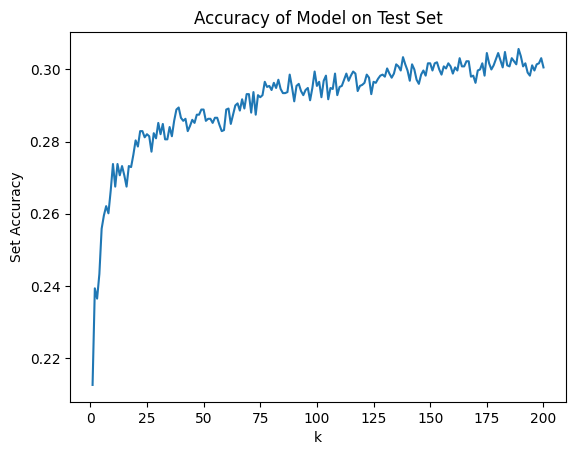

Best K for best accuracy is: 189


In [62]:
#########
# KNN data model
Knn_Acc = []
kMax = 200
k_list = list(range(1,kMax+1))

for k in range(1,kMax+1):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    Knn_Acc.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, Knn_Acc)
plt.xlabel("k")
plt.ylabel("Set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(Knn_Acc)

print(f"Best K for best accuracy is: {l_np.argmax()+1}")
#bestK = l_np.argmax()+1
bestK = 189

In [63]:
# Perform regression using best K
KNNmodel = KNeighborsClassifier(n_neighbors = bestK)
KNNmodel.fit(X_train_scaled, y_train)

training_accuracy = KNNmodel.score(X_train_scaled, y_train)
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = KNNmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))
#model data is 31%, the predictions are even at 31%

The accuracy of model on training data is: 31.0%

                precision    recall  f1-score   support

a little extra       0.00      0.00      0.00       198
      athletic       0.35      0.45      0.40       741
       average       0.29      0.63      0.39       918
         curvy       0.27      0.05      0.09       291
           fit       0.29      0.19      0.23       797
  full figured       0.00      0.00      0.00        74
        jacked       0.00      0.00      0.00        27
    overweight       0.00      0.00      0.00        40
rather not say       0.00      0.00      0.00        11
        skinny       0.00      0.00      0.00        94
          thin       0.00      0.00      0.00       287
       used up       0.00      0.00      0.00        32

      accuracy                           0.31      3510
     macro avg       0.10      0.11      0.09      3510
  weighted avg       0.24      0.31      0.25      3510



In [64]:
##############
#Decision Tree
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 5),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()

tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)
tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

# 31%, still pretty bad

### Tuned decision tree
DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  8, min_samples_leaf = 2)
DTmodel.fit(X_train_scaled, y_train)

training_accuracy = DTmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = DTmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))

print(DTmodel.get_depth())

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 3}
Best score is 0.28368945868945866
The accuracy of model on training data is: 33.0%

                precision    recall  f1-score   support

a little extra       0.08      0.01      0.02       198
      athletic       0.34      0.43      0.38       741
       average       0.28      0.51      0.36       918
         curvy       0.23      0.12      0.16       291
           fit       0.24      0.22      0.23       797
  full figured       0.00      0.00      0.00        74
        jacked       0.00      0.00      0.00        27
    overweight       0.00      0.00      0.00        40
rather not say       0.00      0.00      0.00        11
        skinny       0.00      0.00      0.00        94
          thin       0.00      0.00      0.00       287
       used up       0.00      0.00      0.00        32

      accuracy                           0.28      3510
     macro avg       0.10      0.11  

In [65]:
##############
# Support Vecotr Machine
# this either takes a very long time, or isn't working!
param_grid = {'C': [0.1, 1, 10], 
              'gamma': [0.1, 1, 10],
              'kernel': ['linear', 'rbf']}

SVCmodel = SVC()
svm_cv = GridSearchCV(SVCmodel, param_grid, cv = 5)
svm_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Support Vector Machine classifier Parameters: {}".format(svm_cv.best_params_))
print("Best score is {}".format(svm_cv.best_score_))



KeyboardInterrupt: 

In [ ]:
SVCmodel = SVC(kernel = 'rbf', C = 0.1, gamma = 1)
SVCmodel.fit(X_train_scaled, y_train)
training_accuracy = SVCmodel.score(X_train_scaled, y_train)
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))

##############################
# Conclusion:
All the models are around 30% accuracy which is poor for a model. 

This means the data cannot be used to accurately predict body type. This would mostly 
be due to the fact that the originating data is how the user sees themselves, and is in no
way empirical data.

##############################
# Question 3
Predict sex with education level and income??

In [66]:
df_copy3 = df
df_copy3[df_copy3.income==-1]= np.nan
temp = df_copy3.income.value_counts(dropna = False)
#print(temp)
selected_features = ['income', 'job', 'sex', 'education']
df_copy3 = df_copy3[selected_features].dropna()

#convert 'job', 'sex' and 'education' into dummy variables
categoricalCols = ['job', 'sex', 'education']
for col in categoricalCols:
    df_copy3 = pd.get_dummies(df_copy3, columns=[col], prefix = [col], drop_first =True)

print(df_copy3.shape)

(10536, 52)


In [68]:
#print(df_copy3.head(15))
#Y is the target column, X has the features
X = df_copy3.iloc[:, 1:]
y = df_copy3['income']

In [69]:
#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 128)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

Text(0.5, 1.0, 'Accuracy of Model on Test Set')

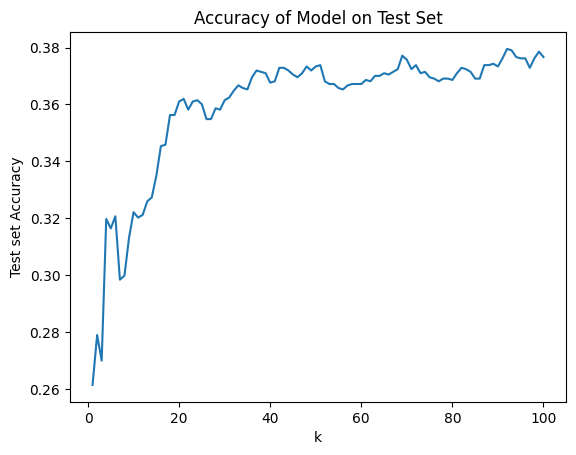

In [70]:
###############
# K Nearest Neighbour
accuracies = []
k_list = list(range(1,101))

for k in range(1,101):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train, y_train)
    accuracies.append(KNNmodel.score(X_test, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
#plt.show()

In [71]:
l_np = np.asarray(accuracies)
bestK = l_np.argmax()+1
print(f"Best K for best accuracy is: {bestK}")

Best K for best accuracy is: 92


In [72]:
KNNmodel = KNeighborsClassifier(n_neighbors = bestK).fit(X_train, y_train)
KNN_predictions = KNNmodel.predict(X_test)
training_accuracy = KNNmodel.score(X_train, y_train)
print(classification_report(y_test, KNN_predictions))

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

# model, 36%, output = 38%

              precision    recall  f1-score   support

     20000.0       0.43      0.96      0.59       544
     30000.0       0.00      0.00      0.00       200
     40000.0       0.21      0.02      0.03       173
     50000.0       0.19      0.07      0.10       173
     60000.0       0.05      0.01      0.01       126
     70000.0       0.00      0.00      0.00       121
     80000.0       0.26      0.02      0.05       201
    100000.0       0.35      0.72      0.47       333
    150000.0       0.21      0.11      0.15       116
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        12
   1000000.0       0.29      0.02      0.04        86

    accuracy                           0.38      2108
   macro avg       0.17      0.16      0.12      2108
weighted avg       0.25      0.38      0.25      2108

The accuracy of model on training data is: 36.0%


In [73]:
#################
# Decision tree classifier
param_grid = {"max_depth": [8, 12, 18, 24, None],
              "min_samples_leaf": range(1, 9),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()
tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)
tree_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

DTmodel = DecisionTreeClassifier(criterion =  'gini' , max_depth =  18, min_samples_leaf = 3)
DTmodel.fit(X_train, y_train)
training_accuracy = DTmodel.score(X_train, y_train)
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()
predictions = DTmodel.predict(X_test)

print(classification_report(y_test, predictions))

# output model is 38%, prediction accuracy is 37%

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 18, 'min_samples_leaf': 3}
Best score is 0.3481259173997064
The accuracy of model on training data is: 38.0%

              precision    recall  f1-score   support

     20000.0       0.45      0.93      0.61       544
     30000.0       0.12      0.02      0.03       200
     40000.0       0.32      0.08      0.13       173
     50000.0       0.19      0.11      0.14       173
     60000.0       0.00      0.00      0.00       126
     70000.0       0.14      0.02      0.03       121
     80000.0       0.14      0.05      0.07       201
    100000.0       0.33      0.66      0.44       333
    150000.0       0.23      0.07      0.11       116
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        12
   1000000.0       0.14      0.01      0.02        86

    accuracy                           0.37      2108
   macro avg       0.17      0.16      0.13      2108
weighted

In [74]:
########
# SVC Model
SVCmodel = SVC(kernel = 'linear', C = 1)
SVCmodel.fit(X_train, y_train)
training_accuracy = SVCmodel.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = SVCmodel.predict(X_test)
print(classification_report(y_test, predictions))
# 38% accuracy

The accuracy of model on training data is: 36.0%

              precision    recall  f1-score   support

     20000.0       0.50      0.89      0.64       544
     30000.0       0.11      0.01      0.01       200
     40000.0       0.13      0.03      0.05       173
     50000.0       0.20      0.16      0.18       173
     60000.0       0.00      0.00      0.00       126
     70000.0       0.08      0.02      0.03       121
     80000.0       0.17      0.07      0.10       201
    100000.0       0.33      0.77      0.46       333
    150000.0       0.50      0.01      0.02       116
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        12
   1000000.0       0.10      0.05      0.06        86

    accuracy                           0.38      2108
   macro avg       0.18      0.17      0.13      2108
weighted avg       0.27      0.38      0.27      2108



In [75]:
##############
# Logistic Regression
logReg_model = LogisticRegression(multi_class= "multinomial")
logReg_model.fit(X_train, y_train)
training_accuracy = logReg_model.score(X_train, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
print()

predictions = logReg_model.predict(X_test)
print(classification_report(y_test, predictions))

# data accuracy is 37%, prediction is 38%


The accuracy of model on training data is: 37.0%

              precision    recall  f1-score   support

     20000.0       0.50      0.89      0.64       544
     30000.0       0.15      0.01      0.03       200
     40000.0       0.14      0.03      0.05       173
     50000.0       0.17      0.12      0.14       173
     60000.0       0.00      0.00      0.00       126
     70000.0       0.12      0.02      0.03       121
     80000.0       0.14      0.10      0.12       201
    100000.0       0.32      0.71      0.44       333
    150000.0       0.34      0.10      0.16       116
    250000.0       0.00      0.00      0.00        23
    500000.0       0.00      0.00      0.00        12
   1000000.0       0.26      0.08      0.12        86

    accuracy                           0.38      2108
   macro avg       0.18      0.17      0.14      2108
weighted avg       0.27      0.38      0.28      2108



## Question 3 conclusion
All models well under 50% so not a good data source for the hypothesis

###########################
# Question 4
Predict sex based on age and body type

In [76]:
q4data = df
selected_features = ['sex', 'body_type_code', 'height']
q4data = q4data[selected_features].dropna()

print(q4data.shape)
#print(q4data.head())

#Y is the target column, X has the features
X = q4data.iloc[:, 1:]
y = q4data['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

(10938, 3)


In [77]:
#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

scaler = StandardScaler()

# standardization 
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

scaler2 = MinMaxScaler()
 
# normalization 
X_train_normalized = scaler2.fit_transform(X_train) 
X_test_normalized = scaler2.fit_transform(X_test)

In [78]:

import time
# Perform Multinomial NB
NBmodel = MultinomialNB()
#NBmodel = GaussianNB()
start_time = time.time()

NBmodel.fit(X_train_normalized, y_train)
training_accuracy = NBmodel.score(X_train_normalized, y_train)
predictions = NBmodel.predict(X_test_normalized)

print(classification_report(y_test, predictions))
print()

end_time = time.time()
runtime =  end_time - start_time

print(f"The runtime of Multinomial Naive Bayes model is: {round(runtime, 5)} seconds")
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

              precision    recall  f1-score   support

           f       0.00      0.00      0.00       616
           m       0.72      1.00      0.84      1572

    accuracy                           0.72      2188
   macro avg       0.36      0.50      0.42      2188
weighted avg       0.52      0.72      0.60      2188


The runtime of Multinomial Naive Bayes model is: 0.08531 seconds
The accuracy of model on training data is: 73.0%


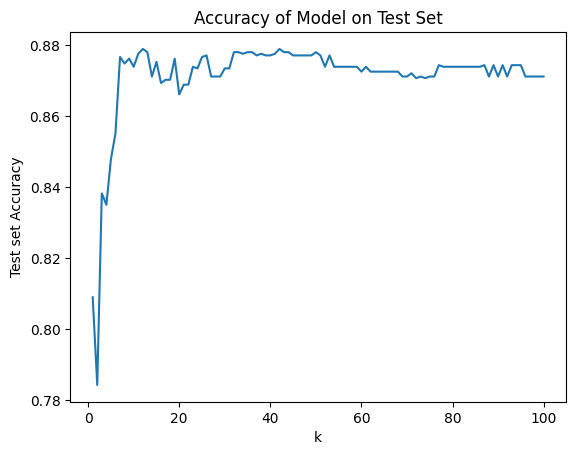

In [79]:

#################
# KNN
accuracies = []
maxK = 100
k_list = list(range(1,maxK+1))

for k in range(1,maxK+1):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))
    
    
plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

In [80]:
l_np = np.asarray(accuracies)
bestK = l_np.argmax()+1
print(f"Best K for best accuracy is: {bestK}")

start_time = time.time()
KNNmodel = KNeighborsClassifier(n_neighbors = bestK).fit(X_train_scaled, y_train)
KNN_predictions = KNNmodel.predict(X_test_scaled)
training_accuracy = KNNmodel.score(X_train_scaled, y_train)
print(classification_report(y_test, KNN_predictions))
end_time = time.time()
runtime =  end_time - start_time

print(f"The runtime of K Nearest Neighbor model is: {round(runtime, 5)} seconds")
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
# bestK was 12, accuracy on training data is 73%, resulting score is 88%

Best K for best accuracy is: 12
              precision    recall  f1-score   support

           f       0.81      0.75      0.78       616
           m       0.90      0.93      0.92      1572

    accuracy                           0.88      2188
   macro avg       0.86      0.84      0.85      2188
weighted avg       0.88      0.88      0.88      2188

The runtime of K Nearest Neighbor model is: 0.34835 seconds
The accuracy of model on training data is: 88.0%


In [82]:
#####
# Decision Tree
param_grid = {"max_depth": [8, 12, 18, 20, None],
              "min_samples_leaf": list(range(1, 9)),
              "criterion": ["gini", "entropy"]}

DTmodel = DecisionTreeClassifier()
tree_cv = GridSearchCV(DTmodel, param_grid, cv = 5)
tree_cv.fit(X_train_scaled, y_train)

# Print the tuned parameters and score
print("Tuned Decision Tree Parameters: {}".format(tree_cv.best_params_))
print("Best score is {}".format(tree_cv.best_score_))

start_time = time.time()
DTmodel = DecisionTreeClassifier(criterion = 'gini', max_depth = 8, min_samples_leaf = 4)
DTmodel.fit(X_train_scaled, y_train)
training_accuracy = DTmodel.score(X_train_scaled, y_train)
predictions = DTmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))
end_time = time.time()
runtime =  end_time - start_time

print(f"The runtime of Decision Tree model is: {round(runtime, 5)} seconds")
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))

print(DTmodel.get_depth())
# best score 87.9%
# accuracy of model 89%

Tuned Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 12, 'min_samples_leaf': 3}
Best score is 0.8792000000000002
              precision    recall  f1-score   support

           f       0.79      0.75      0.77       616
           m       0.90      0.92      0.91      1572

    accuracy                           0.87      2188
   macro avg       0.84      0.84      0.84      2188
weighted avg       0.87      0.87      0.87      2188

The runtime of Decision Tree model is: 0.07281 seconds
The accuracy of model on training data is: 89.0%
8


In [83]:
############
# SVN
start_time = time.time()
SVCmodel = SVC(kernel = 'linear', C = 1)
SVCmodel.fit(X_train_scaled, y_train)
training_accuracy = SVCmodel.score(X_train_scaled, y_train)
predictions = SVCmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))
end_time = time.time()
runtime =  end_time - start_time

print(f"The runtime of SVM model is: {round(runtime, 5)} seconds")
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
# class report 86%, score on data was 87%

              precision    recall  f1-score   support

           f       0.81      0.68      0.74       616
           m       0.88      0.94      0.91      1572

    accuracy                           0.86      2188
   macro avg       0.84      0.81      0.82      2188
weighted avg       0.86      0.86      0.86      2188

The runtime of SVM model is: 1.36833 seconds
The accuracy of model on training data is: 87.0%


In [84]:
##################
# Logistic Regression
start_time = time.time()
logReg_model = LogisticRegression(multi_class= "multinomial")
logReg_model.fit(X_train_scaled, y_train)
training_accuracy = logReg_model.score(X_train_scaled, y_train)
predictions = logReg_model.predict(X_test_scaled)
print(classification_report(y_test, predictions))
end_time = time.time()
runtime =  end_time - start_time

print(f"The runtime of Logistic Regression model is: {round(runtime, 5)} seconds")
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
# class report 86%, accuracy 87%

              precision    recall  f1-score   support

           f       0.81      0.68      0.74       616
           m       0.88      0.94      0.91      1572

    accuracy                           0.86      2188
   macro avg       0.84      0.81      0.82      2188
weighted avg       0.86      0.86      0.86      2188

The runtime of Logistic Regression model is: 0.11797 seconds
The accuracy of model on training data is: 87.0%


## Review
All models were quite good at predicting the sex based on the given data

###############################
# Question 5
Can we predict education level and income? How about word counts?

In [85]:
q5data = df
q5data[q5data.income==-1]= np.nan
selected_features = ['sex', 'education', 'income']
q5data = q5data[selected_features].dropna()

#convert 'education' into dummy variable
q5data = pd.get_dummies(q5data, columns=['education'], prefix = ['education'])

print(q5data.shape)
#print(q5data.head())

(10783, 33)


In [86]:
#Y is the target column, X has the features
X = q5data.iloc[:, 1:]
y = q5data['sex']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#Pandas Series.ravel() function returns the flattened underlying data as an ndarray(1d array)
y_train = y_train.ravel()
y_test = y_test.ravel()

#scaler = StandardScaler()

scaler = MinMaxScaler()
 
# normalization
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [87]:
########### 
# Multi NB
NBmodel = MultinomialNB()
NBmodel.fit(X_train_scaled, y_train)
training_accuracy = NBmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
predictions = NBmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))

# model accuracy 73%, data accuracy 71%

The accuracy of model on training data is: 73.0%
              precision    recall  f1-score   support

           f       0.25      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.71      2157
   macro avg       0.48      0.50      0.42      2157
weighted avg       0.58      0.71      0.60      2157



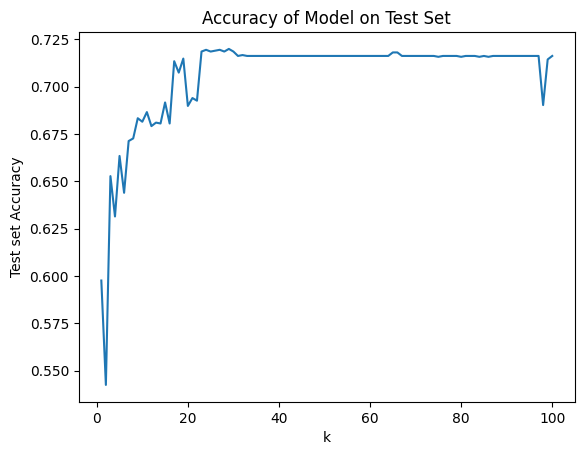

Best K for best accuracy is: 29


In [88]:
################
# KNN
accuracies = []
maxK = 100
k_list = list(range(1,maxK+1))

for k in range(1,maxK+1):
    KNNmodel = KNeighborsClassifier(n_neighbors = k)
    KNNmodel.fit(X_train_scaled, y_train)
    accuracies.append(KNNmodel.score(X_test_scaled, y_test))

plt.plot(k_list, accuracies)
plt.xlabel("k")
plt.ylabel("Test set Accuracy")
plt.title("Accuracy of Model on Test Set")
plt.show()

l_np = np.asarray(accuracies)
bestK = l_np.argmax()+1
print(f"Best K for best accuracy is: {bestK}")


In [89]:
KNNmodel = KNeighborsClassifier(n_neighbors = bestK)
KNNmodel.fit(X_train_scaled, y_train)
training_accuracy = KNNmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
predictions = KNNmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))

# bestK was 29
# mode accuracy 73%, score 72%

The accuracy of model on training data is: 73.0%
              precision    recall  f1-score   support

           f       0.57      0.06      0.11       613
           m       0.73      0.98      0.83      1544

    accuracy                           0.72      2157
   macro avg       0.65      0.52      0.47      2157
weighted avg       0.68      0.72      0.63      2157



In [90]:
################
# Logistic Regression
logReg_model = LogisticRegression(multi_class= "multinomial")
logReg_model.fit(X_train_scaled, y_train)
training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
predictions = logReg_model.predict(X_test_scaled)

print(classification_report(y_test, predictions))
# mode accuracy 73%, score 72%

The accuracy of model on training data is: 73.0%
              precision    recall  f1-score   support

           f       0.33      0.00      0.00       613
           m       0.72      1.00      0.83      1544

    accuracy                           0.72      2157
   macro avg       0.52      0.50      0.42      2157
weighted avg       0.61      0.72      0.60      2157



do for decision tree, and support vector machine later....much of a muchness though

All models were around 73% accuracy

#########################################
# Question 6: Predict education level with essay text word counts

In [91]:
#########################################
#Question 6: Predict education level with essay text word counts
# clean the text of links and hashtags


import string
from html.parser import HTMLParser
import re       # regex library

#<.*?>
#r'<[^>]+>'
TAG_RE = re.compile(r'<.*?>')
def remove_tags(dirty_string):
    return re.sub(TAG_RE, '', dirty_string)


def cleanText(dirty_text):
    #Removing URLs and Hashtags
    # remove hyperlinks
    text = re.sub(r'https?:\/\/.\S+', "", dirty_text)
    # remove hashtags
    text = re.sub(r'#', '', text)
    # remove html tags from text
    text = remove_tags(text)
    # removing HTML characters
    #text = HTMLParser().unescape(text)
    #remove punctuation marks from the text
    for c in string.punctuation:
        if c in text:
            text = text.replace(c, "")
    return text

q6data = df

essay_cols = ["essay0","essay1","essay2","essay3","essay4","essay5","essay6","essay7","essay8","essay9"]

# Removing the NaNs
all_essays = q6data[essay_cols].replace(np.nan, '', regex=True)

# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)

#clean the dirty text from hyperlinks, punctuation and html tags
q6data["all_essays_cleaned_text"] = all_essays.apply(cleanText)

#compute the length of each essay and save them on a new column
q6data["essay_len"] = q6data["all_essays_cleaned_text"].apply(lambda x: len(x))

In [92]:
#count the number of words in each essay
q6data["word_count"] =  q6data["all_essays_cleaned_text"].apply(lambda x: len(x.split())) 

#compute the avrage length of each word
#q6data["avg_word_len_temp"] = q6data['essay_len'] / q6data['word_count']
q6data["avg_word_len"] = q6data.apply(lambda row: 0 if row.word_count==0 else (row.essay_len/row.word_count), axis = 1)
#count the number of "i" or "me" occurances in the essay text of each user
q6data["i_or_me_count"] = q6data["all_essays_cleaned_text"].apply(lambda x: x.split().count('i') + x.split().count('me'))

#create copy of dataframe to do the changes only to a copy of data
df_copy6 = q6data
selected_features = ['education', 'word_count']
df_copy6 = df_copy6[selected_features].dropna()
print(df_copy6.shape)
#print(df_copy6.head(10))

(10783, 2)


In [93]:
########## Data extracted, transform and prepare it 
#Y is the response variable, X is the predictor variable
X = df_copy6[['word_count']]
y = df_copy6['education']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 40)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [94]:
##################
# Logistic Regression 
logReg_model = LogisticRegression(multi_class= "multinomial")
logReg_model.fit(X_train_scaled, y_train)
training_accuracy = logReg_model.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
predictions = logReg_model.predict(X_test_scaled)
print(classification_report(y_test, predictions))

# 45% acc

The accuracy of model on training data is: 39.0%
                                   precision    recall  f1-score   support

               college/university       0.00      0.00      0.00        25
dropped out of college/university       0.00      0.00      0.00        80
       dropped out of high school       0.00      0.00      0.00        12
   dropped out of masters program       0.00      0.00      0.00         8
        dropped out of med school       0.00      0.00      0.00         1
      dropped out of ph.d program       0.00      0.00      0.00         6
        dropped out of space camp       0.00      0.00      0.00        20
  dropped out of two-year college       0.00      0.00      0.00        14
graduated from college/university       0.39      1.00      0.56       847
       graduated from high school       0.00      0.00      0.00       112
        graduated from law school       0.00      0.00      0.00        30
   graduated from masters program       0.00      

In [95]:
################
# SVC
SVCmodel = SVC(kernel = 'linear', C = 1)
SVCmodel.fit(X_train_scaled, y_train)
training_accuracy = SVCmodel.score(X_train_scaled, y_train)

print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
predictions = SVCmodel.predict(X_test_scaled)
print(classification_report(y_test, predictions))

# this one is slow, and has 45% accuracy on both training data and set

The accuracy of model on training data is: 39.0%
                                   precision    recall  f1-score   support

               college/university       0.00      0.00      0.00        25
dropped out of college/university       0.00      0.00      0.00        80
       dropped out of high school       0.00      0.00      0.00        12
   dropped out of masters program       0.00      0.00      0.00         8
        dropped out of med school       0.00      0.00      0.00         1
      dropped out of ph.d program       0.00      0.00      0.00         6
        dropped out of space camp       0.00      0.00      0.00        20
  dropped out of two-year college       0.00      0.00      0.00        14
graduated from college/university       0.39      1.00      0.56       847
       graduated from high school       0.00      0.00      0.00       112
        graduated from law school       0.00      0.00      0.00        30
   graduated from masters program       0.00      

In [96]:
####################
# Decision tree
DTmodel = DecisionTreeClassifier()
DTmodel.fit(X_train_scaled, y_train)
training_accuracy = DTmodel.score(X_train_scaled, y_train)
print("The accuracy of model on training data is: {}%".format(round(training_accuracy, 2) *100))
predictions = DTmodel.predict(X_test_scaled)

print(classification_report(y_test, predictions))
# 46% accuracy on model, 44% on data

The accuracy of model on training data is: 44.0%
                                   precision    recall  f1-score   support

               college/university       0.00      0.00      0.00        25
dropped out of college/university       0.00      0.00      0.00        80
       dropped out of high school       0.00      0.00      0.00        12
   dropped out of masters program       0.00      0.00      0.00         8
        dropped out of med school       0.00      0.00      0.00         1
      dropped out of ph.d program       0.00      0.00      0.00         6
        dropped out of space camp       0.04      0.05      0.05        20
  dropped out of two-year college       0.00      0.00      0.00        14
graduated from college/university       0.39      0.78      0.52       847
       graduated from high school       0.11      0.02      0.03       112
        graduated from law school       0.00      0.00      0.00        30
   graduated from masters program       0.12      

## conclusion
# Word count doesn't really have a correlation for education level


---
# Question 7: 
Can we predict income with length of essays and average word length?

In [97]:
#create copy of dataframe to do the changes only to a copy of data
df_copy7 = q6data
selected_features = ['income', 'essay_len', 'avg_word_len']
df_copy7[df_copy7.income==-1]= np.nan
df_copy7 = df_copy7[selected_features].dropna()

print(df_copy7.shape)
#print(df_copy7.head(10))

(11504, 3)


In [98]:
##### Transform the data
#Y is the response variable, X has the predictor variables
X = df_copy7[['essay_len', 'avg_word_len']]
y = df_copy7['income']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [100]:
##############
# Create linear regression model
# creating a regression model
mlr = LinearRegression()

# fitting the model with training data
mlr.fit(X_train_scaled,y_train)

print(f"coeficient for linear regression model is: {mlr.coef_}")
print(f"intercept for our model is: {mlr.intercept_}")



coeficient for linear regression model is: [-2788.46717175  7205.8885584 ]
intercept for our model is: 104476.80104313811


In [101]:
predictions = mlr.predict(X_test_scaled)

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

r_squared = mlr.score(X_test_scaled, y_test)

print(f"R2 value of our model is: {r_squared}")
df_copy7.income.describe()

mean_squared_error :  39828762412.64792
mean_absolute_error :  91814.52969607952
R2 value of our model is: 0.0008345072475092197


count      11504.000000
mean      104394.993046
std       201433.528307
min        20000.000000
25%        20000.000000
50%        50000.000000
75%       100000.000000
max      1000000.000000
Name: income, dtype: float64

## Conclusion
Far too much error here, and a very low R2 value makes this mode very inaccurate for the provided data

---

# Question 8: 
Can we predict age with the frequency of "I" or "me" in essays?

In [102]:
df_copy8 = q6data
selected_features = ['age', 'i_or_me_count']
df_copy8 = df_copy8[selected_features].dropna()

print(df_copy8.shape)
# output data looks pretty uniform, it's probably not going to work well unless we can normalise the age counts
#print(df_copy8.head(10))

#Y is the response variable, X is predictor variable
X = df_copy8[['i_or_me_count']]
y = df_copy8['age']

(11504, 2)


In [103]:
#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)


In [104]:
#create copy of dataframe to do the changes only to a copy of data
#Y is the response variable, X is predictor variable
X = df_copy8[['i_or_me_count']]
y = df_copy8['age']

#Split the data into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

scaler = StandardScaler()
#normalization
#scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train) 
X_test_scaled = scaler.fit_transform(X_test)

In [105]:
###############
# Linear regression model
start_time = time.time()
# creating a regression model
lr_model = LinearRegression()
# fitting the model with training data
lr_model.fit(X_train_scaled,y_train)
predictions = lr_model.predict(X_test_scaled)
end_time = time.time()

runtime =  end_time - start_time

print(f"coeficient for linear regression model is: {lr_model.coef_}")
print(f"intercept for our model is: {lr_model.intercept_}")

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"RMSE of linear regression model is: {rmse}")
r_squared = lr_model.score(X_test_scaled, y_test)
print(f"R2 value of our model is: {r_squared}")
print(f"The runtime of linear regression model is: {round(runtime, 5)} seconds")

coeficient for linear regression model is: [0.20910679]
intercept for our model is: 32.565793762903404
mean_squared_error :  93.39034339524011
mean_absolute_error :  7.636544407649698
RMSE of linear regression model is: 9.663867931384416
R2 value of our model is: -0.0012649798460226958
The runtime of linear regression model is: 0.00833 seconds


In [106]:

########################
# KNN
from sklearn.neighbors import KNeighborsRegressor

gridsearch = GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors':list(range(1, 100)),
                         'weights': ['uniform', 'distance']})
gridsearch.fit(X_train_scaled, y_train)

print(gridsearch.best_params_)
# best params 93

{'n_neighbors': 98, 'weights': 'uniform'}


In [107]:
start_time = time.time()
knn_model = KNeighborsRegressor(n_neighbors= 96, weights = 'uniform')
knn_model.fit(X_train_scaled, y_train)
predictions = knn_model.predict(X_test_scaled)
end_time = time.time()
runtime =  end_time - start_time

# model evaluation
print('mean_squared_error : ', mean_squared_error(y_test, predictions))
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions))

rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"RMSE of knn model is: {rmse}")
r_squared = knn_model.score(X_test_scaled, y_test)
print(f"R2 value of our model is: {r_squared}")
print(f"The runtime of KNeighbors Regressor model is: {round(runtime, 5)} seconds")

mean_squared_error :  94.73313360699153
mean_absolute_error :  7.692764921048821
RMSE of knn model is: 9.733094759992401
R2 value of our model is: -0.015661423476352354
The runtime of KNeighbors Regressor model is: 0.03518 seconds


# TO DO:
- Normalise age based on total number of respondants
-Normalise sex based on total number and re-run these tests